# XGBoost Feature Importance

Feature importance refers to a class of techniques for assigning scores to input features to a predictive model that indicates the relative importance of each feature when making a prediction. Feature importance scores can be calculated for problems that involve predicting a numerical value, called regression, and those problems that involve predicting a class label, called classification.

Feature importance scores can provide insight into the dataset. The relative scores can highlight which features may be most relevant to the target, and the converse, which features are the least relevant. This may be interpreted by a domain expert and could be used as the basis for gathering more or different data.

Feature importance scores can provide insight into the model. Most importance scores are calculated by a predictive model that has been fit on the dataset. Inspecting the importance score provides insight into that specific model and which features are the most important and least important to the model when making a prediction. This is a type of model interpretation that can be performed for those models that support it.

Feature importance can be used to improve a predictive model. This can be achieved by using the importance scores to select those features to delete (lowest scores) or those features to keep (highest scores). This is a type of feature selection and can simplify the problem that is being modeled, speed up the modeling process (deleting features is called dimensionality reduction), and in some cases, improve the performance of the model.

XGBoost is a library that provides an efficient and effective implementation of the stochastic gradient boosting algorithm. This algorithm can be used with scikit-learn via the XGBRegressor and XGBClassifier classes. After being fit, the model provides a feature_importances_ property that can be accessed to retrieve the relative importance scores for each input feature. This algorithm is also provided via scikit-learn via the GradientBoostingClassifier and GradientBoostingRegressor classes and the same approach to feature selection can be used.

## Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.datasets import make_regression
from xgboost import XGBClassifier
from xgboost import XGBRegressor

## XGBoost Classification Feature Selection (Numerical Input & Categorical Output)


In [2]:
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
print(X.shape, y.shape)

(1000, 10) (1000,)


In [3]:
# define the model
model = XGBClassifier()

In [4]:
# fit the model
model.fit(X, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [5]:
# get importance
importance = model.feature_importances_

In [6]:
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.02464
Feature: 1, Score: 0.08153
Feature: 2, Score: 0.12516
Feature: 3, Score: 0.28400
Feature: 4, Score: 0.12694
Feature: 5, Score: 0.10752
Feature: 6, Score: 0.08624
Feature: 7, Score: 0.04820
Feature: 8, Score: 0.09357
Feature: 9, Score: 0.02220


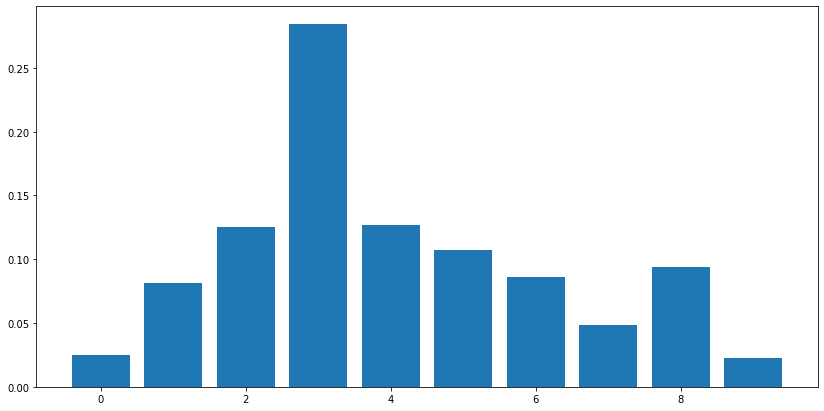

In [7]:
# plot feature importance
plt.figure(figsize=(14,7))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Running the example fits the model then reports the coefficient value for each feature. The results suggest perhaps seven of the 10 features as being important to prediction.


## XGBoost Regression Feature Selection (Numerical Input & Numerical Output)


In [8]:
# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
print(X.shape, y.shape)

(1000, 10) (1000,)


In [9]:
# define the model
model = XGBRegressor()

In [10]:
# fit the model
model.fit(X, y)

[20:22:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [11]:
# get importance
importance = model.feature_importances_

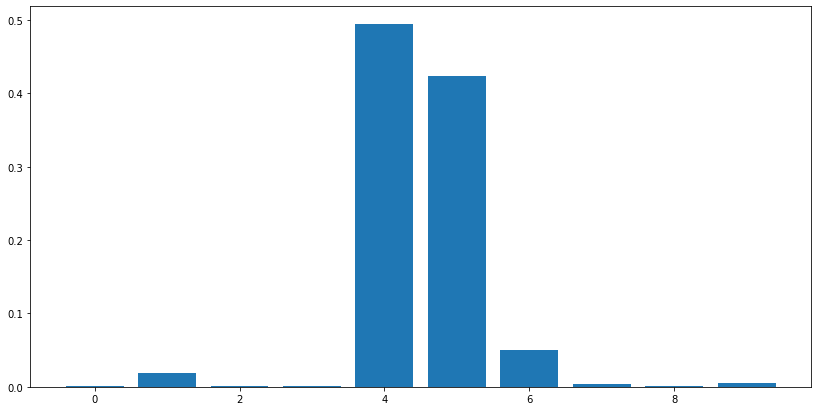

In [12]:
# plot feature importance
plt.figure(figsize=(14,7))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Running the example fits the model, then reports the coefficient value for each feature. The results suggest perhaps two or three of the 10 features as being important to prediction.